##  Importing Libraries and Loading MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Imports necessary libraries: TensorFlow, Keras, NumPy, and Matplotlib.**

**Loads the MNIST dataset using Keras.**

**Normalizes pixel values to the range [0, 1] by dividing by 255.**

## Model Definition and Compilation

In [4]:
model = keras.Sequential([
keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
keras.layers.Conv2D(32, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(64, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(10)
])

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])




1875/1875 [==============================] - 31s 15ms/step - loss: 0.1436 - accuracy: 0.9559
313/313 - 2s - loss: 0.0471 - accuracy: 0.9844 - 2s/epoch - 7ms/step

Test accuracy: 98.44%


**Defines a Sequential model with Convolutional and Dense layers for image classification.**

**Compiles the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric.**

## Model Training

In [ ]:
model.fit(train_images, train_labels, epochs=1)

**Trains the model on the training images and labels for one epoch.**

## Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

**Evaluates the model on the test images and labels, printing the test accuracy.**

## Making Predictions and Visualization

In [6]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(f'Predicted: {predicted_label} ({100*np.max(predictions_array):.2f}%)', color=color)

In [13]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

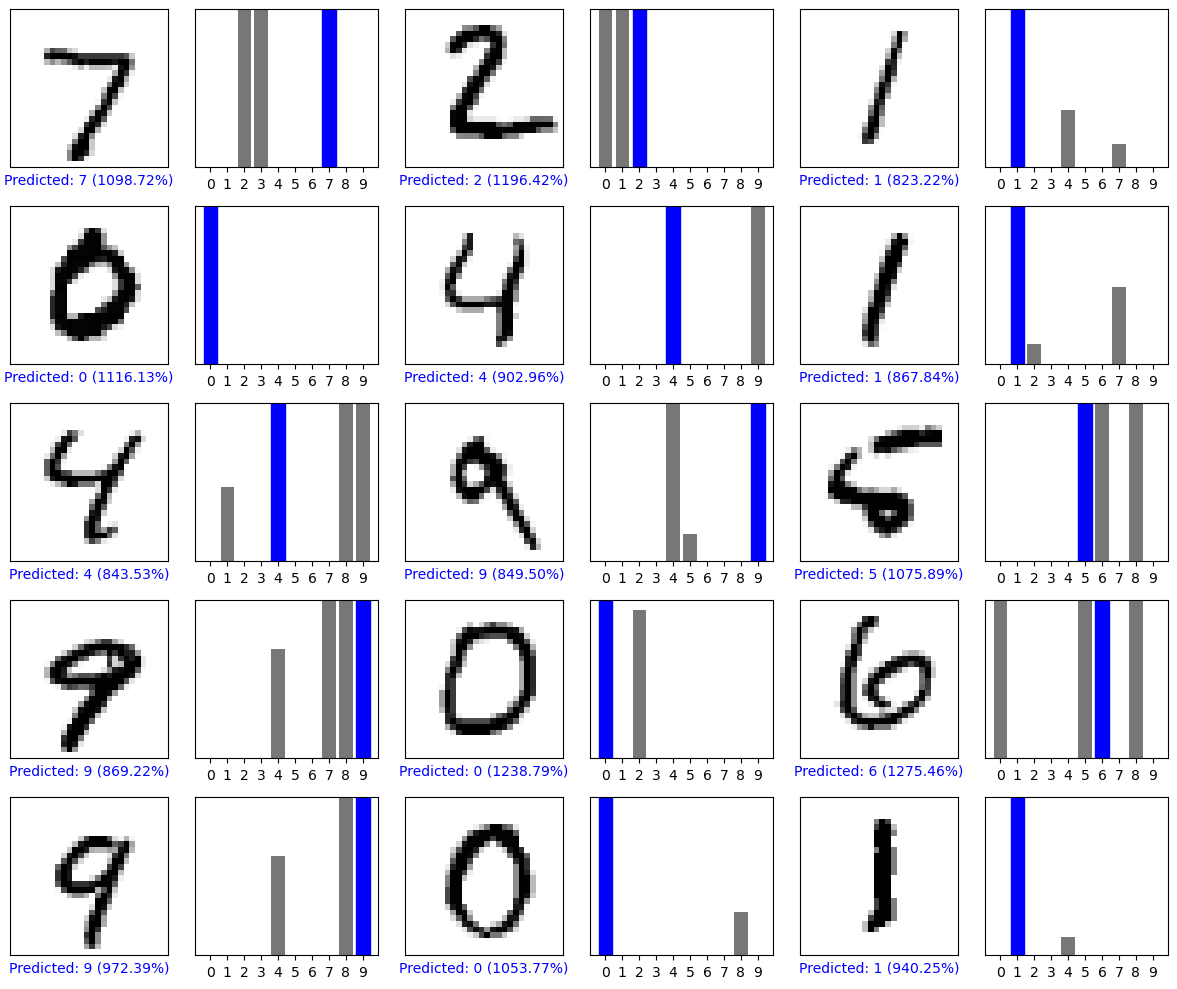

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Defines functions plot_image and plot_value_array for visualizing predictions.**

**Iterates through a subset of test images, plots each image along with its predicted label and prediction confidence.**